## Ridge Regression

**Here is just a small test about does scaling is important in Ridge regression**.

In [1]:
print(__doc__)

Automatically created module for IPython interactive environment


In [2]:
%load_ext watermark
%watermark -a 'RoachSiani' -d -p numpy,sklearn,matplotlib -v

RoachSiani 2016-08-27 

CPython 3.5.2
IPython 5.1.0

numpy 1.11.0
sklearn 0.17.1
matplotlib 1.5.1


In [3]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn import datasets

In [4]:
# make data: sample has two features.

data_X, data_Y = datasets.make_regression(n_samples=50,n_features=2,n_informative=1,noise=10,random_state=10)

In [5]:
from sklearn import linear_model

clf = linear_model.Ridge(alpha=.1);
clf.fit(data_X, data_Y)
predict_Y = clf.predict(data_X)

print(data_X[0:10,:])

print('##########################')

print('##########################')

# The coefficients
print('Coefficients: \n', clf.coef_)
# The mean square error
print("Residual sum of squares: %.2f"
      % np.mean((clf.predict(data_X) - data_Y) ** 2))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % clf.score(data_X, data_Y))

[[ 0.61320418 -0.27124799]
 [-0.54930901 -0.26731719]
 [ 1.67262221  1.12369125]
 [-0.2227737  -1.85618548]
 [ 0.24454398  1.10770823]
 [-0.00838385 -1.54540029]
 [ 0.62060066 -1.50832149]
 [-0.52929608 -0.08112218]
 [-0.72008556  0.62133597]
 [-1.95451212  0.82699862]]
##########################
##########################
Coefficients: 
 [ -0.40706277  30.93773998]
Residual sum of squares: 86.83
Variance score: 0.90


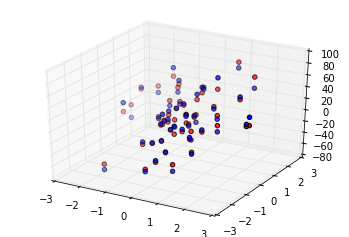

In [6]:
%matplotlib inline

from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(data_X[:,0],data_X[:,1],data_Y)
ax.scatter(data_X[:,0],data_X[:,1],predict_Y,c='r')

## Change magnitude

Let's test the result of **amplification** the sample data.

In [7]:
data_X, data_Y = datasets.make_regression(n_samples=50,n_features=2,n_informative=1,noise=10,random_state=10)

data_X[:,1] *= 10000000000000000000

clf = linear_model.Ridge(alpha=.1);
clf.fit(data_X, data_Y)
predict_Y = clf.predict(data_X)

print(data_X[0:10,:])

print('##########################')

# The coefficients
print('Coefficients: \n', clf.coef_)
# The mean square error
print("Residual sum of squares: %.2f"
      % np.mean((clf.predict(data_X) - data_Y) ** 2))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % clf.score(data_X, data_Y))

[[  6.13204185e-01  -2.71247988e+18]
 [ -5.49309014e-01  -2.67317189e+18]
 [  1.67262221e+00   1.12369125e+19]
 [ -2.22773699e-01  -1.85618548e+19]
 [  2.44543977e-01   1.10770823e+19]
 [ -8.38384993e-03  -1.54540029e+19]
 [  6.20600663e-01  -1.50832149e+19]
 [ -5.29296081e-01  -8.11221838e+17]
 [ -7.20085561e-01   6.21335974e+18]
 [ -1.95451212e+00   8.26998623e+18]]
##########################
Coefficients: 
 [ -4.17393567e-01   3.10117220e-18]
Residual sum of squares: 86.83
Variance score: 0.90


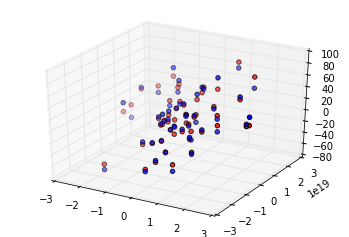

In [8]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(data_X[:,0],data_X[:,1],data_Y)
ax.scatter(data_X[:,0],data_X[:,1],predict_Y,c='r')

**We can found scaling does matter, but just a little**.

Why?

Let's test the result of **reduction** the sample data.

In [9]:
# make data: sample has two features.

data_X, data_Y = datasets.make_regression(n_samples=50,n_features=2,n_informative=1,noise=10,random_state=10)

data_X /= 1000

[[  6.13204185e-04  -2.71247988e-04]
 [ -5.49309014e-04  -2.67317189e-04]
 [  1.67262221e-03   1.12369125e-03]
 [ -2.22773699e-04  -1.85618548e-03]
 [  2.44543977e-04   1.10770823e-03]
 [ -8.38384993e-06  -1.54540029e-03]
 [  6.20600663e-04  -1.50832149e-03]
 [ -5.29296081e-04  -8.11221838e-05]
 [ -7.20085561e-04   6.21335974e-04]
 [ -1.95451212e-03   8.26998623e-04]]
##########################
Coefficients: 
 [ 0.01980552  0.13244964]
Residual sum of squares: 906.67
Variance score: 0.00


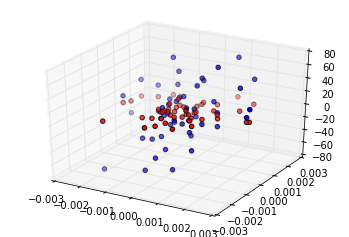

In [10]:
clf = linear_model.Ridge(alpha=10);
clf.fit(data_X, data_Y)
predict_Y = clf.predict(data_X)

print(data_X[0:10,:])

print('##########################')

# The coefficients
print('Coefficients: \n', clf.coef_)
# The mean square error
print("Residual sum of squares: %.2f"
      % np.mean((clf.predict(data_X) - data_Y) ** 2))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % clf.score(data_X, data_Y))

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(data_X[:,0],data_X[:,1],data_Y)
ax.scatter(data_X[:,0],data_X[:,1],predict_Y,c='r')

## Result

If a feature is significant important to a ridge regression, but its scale is very small, then the regression result may be will not what you want.

What you should do is scaling the data.

至于，中间放大数据倍数好像没有影响，是因为你放大了，正则化的时候都会给你降下来。越放大越接近线性回归结果。但是，如果数据中有缩小项，那影响就大了！**你想将系数增大，有惩罚项**！如果数据缩小的特征，是回归的主部，结果通常不好。所以，`Ridge Regression`中扩大数据的量级一点影响没有，但是如果你都扩大了，那就是`线性回归`。

这种情况适用所有的正则化模型！

这时候要对数据进行正则化，那如果主部特征被缩放了怎么办？**交叉验证得到最好的$\lambda$**。而非主部特征被缩放，通常影响不大系数本来就不大。

#### 岭回归的好处

正则化使得模型复杂度降低，这样的结果通常是：方差减小、偏差增大

其实，回归系数中如果存在较大的项，一般表示这个模型偏差较小。

方差偏差是在一个数据集上构建多个模型（通过抽样），统计待测数据的结果得到的。通过交叉验证得到最好的$\lambda$，使得找到最好的方差与偏差的均衡。